![agents](images/header.jpg)
# Análisis semántico
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/nlp/blob/master/6.%20Análisis%20semántico.ipynb)

![ ](images/blank.png)
## Definición

La semántica es, de acuerdo con el [DRAE](http://dle.rae.es/?id=XVRDns5), la...

> Disciplina que estudia el significado de las unidades lingüísticas y de sus combinaciones.

El análisis semántico consiste en analizar el significado de un conjunto de palabras, símbolos y frases, en un contexto específico, con el fin de determinar el mensaje contenido en el texto. 

![](images/nlp02e.png)

En el caso del procesamiento de lenguaje natural, la etapa de análisis semántico toma el flujo de tokens provenientes del análisis léxico, posiblemente categorizadas en los pasos previos, para generar una interpretación del texto.

Sin embargo, tratar de interpretar un mensaje de texto, escrito con muchas libertades, es un problema sumamente complejo aun cuando el texto se encuentre construido de forma correcta. Considérese, por ejemplo, el siguiente monólogo clásico de *Groucho Marx* (*Animal Crackers*, 1930):

> *One morning I shot an elephant in my pajamas. <br>
> How he got in my pajamas, I don't know.* ![](images/groucho.jpg)

Aunque la situación es utilizada como broma, particularmente al ser forzada por Groucho Marx, la estructura es sintácticamente correcta. La interpretación "lógica" se obtiene integrando diversos elementos no disponibles en el texto, particularmente los siguientes: 1) Un elefante no cabe en unas piyamas humanas, y 2) El autor está bromeando.

El alcance del análisis semántico automatizado de lenguajes naturales se limita a tareas específicas, destacándose las siguientes:

* Sistemas de traducción
* Sistemas preguntadores/respondedores
* Sistemas resumidores
* Sistemas de correción ortográfica
* Identificación temática
* Análisis de sentimientos

Siendo las dos últimas las más activas actualmente.

## Modelado de tópicos

El modelado de tópicos es una tarea cuyo objetivo es identificar tópicos a partir de una colección de documentos (un corpus). Los modelos resultantes suelen definirse mediante funciones de distribución de probabilidades sobre un subconjunto de las palabras utilizadas en el corpus. 

Existen diferentes aproximaciones para realizar el modelado de tópicos, siendo las más sobresalientes las técnicas **PLSI** (*probabilistic latent semantic indexing* - indexado probabilístico de semántica latente), **NMF** (*non-negative matrix factorization* -  factorización de matrices no negativas) y **LDA** (*Latent Dirichlet Allocation* - Asignación latente de Dirichlet).


### Identificación de los tópicos 

La identificación de los tópicos presentes en una colección de documentos es un problema de reconocimiento de patrones. 

Las técnicas de reconocimiento de patrones se clasifican en dos tipos principales, de acuerdo al grado de conocimiento disponible:

1. **Aprendizaje no supervisado**. Estos métodos se utilizan cuando no se tiene una definición clara de las clases ni se tienen ejemplos de los objetos pertenecientes a la clase. El punto de partida suele ser un conjunto de observaciones y el resultado suele ser una propuesta de clases, típicamente sin etiquetar. Una de las aproximaciones más comunes es el "*clustering*", en el que los datos se agrupan dependiendo de la semejanza entre ellos.
2. **Aprendizaje supervisado**. En estos métodos, se tienen definidas las etiquetas de las clases, aunque posiblemente no se tenga el modelo que las define. Adicionalmente, se tiene un conjunto de ejemplos ya clasificados a partir de los cuales es posible ajustar los modelos de las clases.

En el caso de la identificación de tópicos es común contar tan sólo con un corpus como información de entrada y, posiblemente, el número de clases/tópicos que se quieren identificar. Por ello, para realizar la identificación de los tópicos lo usual es utilizar técnicas especializadas de *[clustering](http://localhost:8888/notebooks/Dropbox/Notebooks/pattern-recognition/Clustering%20I.ipynb)*. 

El clustering consiste en agrupar objetos en grupos de tal manera que los objetos pertenecientes a un grupo (o "*cluster*") son más semejantes entre sí que a otros objetos no pertenecientes al grupo, de acuerdo a sus características.

![](images/heroes.png)

### Vectores de características 

Un **atributo** es una propiedad simbólica o numérica de una *propiedad* de un objeto, que puede ser útil para clasificarlo en una determinada clase. Los diferentes objetos en un problema son descritos mediante diferentes *conjuntos de atributos*: En una clasificación de documentos, por ejemplo, la descripción de un poema incluye atributos como el tipo de rima o la longitud del verso, atributos que no tiene sentido para para un artículo científico, por ejemplo. 

Una manera de sistematizar y homogenizar la descripción de elementos en un problema es utilizando el mismo conjunto de propiedades para todos ellos, sean útiles o no para la clasificación de un objeto en particular, organizadas en lo que se denomina **vector de características**.

![](images/vector_caracteristicas.png)

Cada 'caso' representado mediante un vector de características en el conjunto de datos se denomina **instancia** (o *ejemplo*, particularmente en el contexto de entrenamiento supervisado). En el caso del análisis de textos, existen pocos rasgos que puedan ser suficientemente discriminantes, por lo tanto, la estrategia más común es utilizar como descripción de un documento una "**bolsa de palabras**".

Una bolsa de palabras (o de tokens) es una colección de los términos considerados  como "significativos" para describir los documentos en un corpus. La opción más simple y muy común es tomar el conjunto total de palabras utilizadas en el corpus, quizás eliminando solamente las palabras de paro. En este caso, el vector de características contabiliza, típicamente, la ocurrencia de palabras/tokens de la bolsa de palabras.

![ ](images/bag-of-words.png)

El resultado típico de un método de *clustering* es un conjunto de vectores "**prototipo**" que sintetizan el modelo de cada una de las clases. 

![](images/prototype.png)

La forma específica del vector prototipo depende de la técnica utilizada.

## Asignación latente de Dirichlet

La asignación latente de Dirichlet (**LDA**) es un método generativo para modelado de tópicos. El método asume que los documentos en un corpus se generan a partir de un conjunto de tópicos. Cada tópico, por otra parte, se representa como una distribución de frecuencias sobre un conjunto de términos/tokens. De esta manera, los documentos constituyen colecciones de palabras cuyas frecuencias *evidencian* la presencia latente de una mezcla de tópicos; es decir, no se requiere especificar una etiqueta del tópico. Por ejemplo, consideremos el siguiente texto:

> Héctor Espino González, conocido como "el supermán de Chihuahua" (o de "la Dale", según el Waissman), es considerado el mejor bateador mexicano de todos los tiempos. Fue campeón bateador en 1964, 1966, 1967, 1968 y 1973 en verano; se coronó en cuatro temporadas como el mejor jonronero; remolcó 1,573 carreras; con 2,752 imparables, 453 de ellos cuadrangulares; acumulando un porcentaje de por vida de .335.  

Es "*obvio*" que este texto habla de béisbol, concretamente de la vida de un beisbolista... aunque también pudiera tratar de comics, aunque con menor probabilidad. De esta manera, la identificación de los tópicos tratados en un texto se puede reducir a verificar qué tanto se  ajusta la colección de palabras a una determinada distribución de probabilidades.

### Distribución de probabilidad de Dirichlet

Una forma común de describir rasgos estadísticos de la ocurrencia de términos en un texto es mediante una función de **[distribución multinomial](http://www.statisticshowto.com/multinomial-distribution/)**. 

Una distribución multinomial es una distribución de probabilidades discreta en la que se tienen $n$ eventos independientes, cada una de ellas con una probabilidad $p_i$ de ocurrencia. Un vector de características $\mathbf{x} = (x_{1},\dots, x_{n})$, en este caso, es un histograma, en el que $x_{i}$ es el número de veces que el evento $i$ ocurre en una instancia específica. 
![ ](images/multinomialDistribution.png)<br>

Si $\mathcal{C} = \{C_1\ldots, C_k\}$ es el conjunto de clases (los tópicos presentes en el corpus, en este caso) y $\mathbf{X_j} = (x_{j1},\dots, x_{jn})$ el vector de características para la instancia $j$, con $n$ el número de caracteristicas (el tamaño de la bolsa de palabras, en este caso), entonces, el prototipo de la clase $c \in \mathcal{C}$, usando la distribución multinomial, puede expresarse mediante la *función de masa de probabilidad*:
$$\boldsymbol{\phi_c} = (\phi_{c_1},\ldots,\phi_{c_n})$$

Aquí $\phi_{c_i} = P(x_i \mid c)$ es la probabilidad de que la característica $i$ se presente en una muestra perteneciente a la clase $c$. Una forma típica de estimar $\phi_{c_i}$ es mediante el método de máxima verosimilitud: <br><br>
$$
\hat{\phi}_{c_i} = \frac{N_{c_i}}{N_c}
$$<br>

En esta ecuación, 
$$N_{c_i} = \sum_{\mathbf{X}\ \in\ c} n_{i}$$
es el número total de veces que aparece el atributo $i$ en las muestras pertenecientes a la clase $c$ (obsérvese que este dato no lo conocemos),

$$N_{c} = \sum_{i=1}^n N_{c_i}$$
es el total de palabras que aparecen en las instancias de la clase $c$.

Este estimador asigna una probabilidad de cero a los eventos que no han ocurrido en los datos de observados. Sin embargo, esta estimación deriva de un procedimiento de observación/muestreo y su interpretación estadística y no necesariamente del comportamiento real del sistema. En el caso de procesamiento de lenguaje natural esto es muy común, dado que un corpus puede tener millones de palabras, mientras que la longitud de un documento puede ser de apenas decenas de palabras. Incluso documentos como las páginas de Wikipedia la relación de palabras usadas en un documento contra la longitud de la bolsa de palabras es muy pequeña. Una técnica utilizada ampliamente en modelado de lenguajes es el "**suavizamiento de probabilidades**", asignando probabilidades diferentes de cero a eventos no observados. Existen [diversas formas](http://www.stat.uchicago.edu/~lafferty/pdf/smooth-tois.pdf) de realizar esta operación. Una de estas formas consiste en utilizar la **[distribución multinomial de Dirichlet](https://en.wikipedia.org/wiki/Dirichlet_distribution)**.

La función de distribución de Dirichlet, para un documento en el que hay $k$ topicos presentes, se define como

$$
f\left(\boldsymbol{\theta};\boldsymbol{\alpha}\right)={\frac {\Gamma \left(\sum_{i=1}^k \alpha_i\right)}{\prod_{i=1}^k\Gamma (\alpha_i)}}
\prod_{i=1}^k \theta_i^{\alpha_i-1} 
\qquad \boldsymbol{\alpha} = (\alpha_1,\cdots, \alpha_k)
$$

donde $\boldsymbol{\theta} = (\theta_1,\cdots, \theta_k), \sum_i \theta_i = 1$ es una distribución multinominal que describe la frecuencia relativa de cada tópico en un documento  y $\boldsymbol{\alpha} = (\alpha_1,\cdots, \alpha_k)$ es un vector de ajuste que pondera la importancia de cada tópico en el documento. $\Gamma(\cdot)$ es la función gamma que extiende el concepto de factorial a los números complejos (y reales, en particular). La función gamma se define como:

$$
\Gamma(x)=\int_0^\infty t^{x-1}e^{-t}\,dt
$$

y cumple con las siguientes propiedades:

$$
\Gamma(1) = 1 \\
\Gamma(1/2) = \sqrt{\pi} \\
\Gamma(x+1) = x \Gamma(x) \\
\Gamma(x) \Gamma(1-x) = \frac{\pi}{sen\pi x} \\
$$

De la misma manera, podemos redefinir $\boldsymbol{\phi}$, utilizando una distribución de Dirichlet, de la siguiente forma:

$$
f\left(\boldsymbol{\phi};\boldsymbol{\beta}\right)={\frac {\Gamma \left(\sum_{i=1}^n \beta_i\right)}{\prod_{i=1}^n\Gamma (\beta_i)}}
\prod_{i=1}^n \phi_i^{\beta_i-1} 
\qquad \boldsymbol{\beta} = (\beta_1,\cdots, \beta_n)
$$

La distribución de Dirichlet es una distribución sobre distribuciones de probabilidad discretas. Mientras que la distribución multinomial describe las proporciones en que aparece cada término en un documento, la distribución de Dirichlet modela la forma en que varían esas proporciones.

### El algoritmo LDA

El algoritmo LDA se suele describir gráficamente, mediante [notación de placa](https://en.wikipedia.org/wiki/Plate_notation), con el siguiente diagrama:

![](images/lda01.png)

En este diagrama, cada rectángulo muestra un grupo de variables que se repite (típicamente, estructuras anidadas), y el indicador en la esquina especifica la cardinalidad del grupo. En este caso, el rectángulo superior representa un tópico; el símbolo $k$, indica el número de tópicos. En el grupo inferior, el rectángulo exterior representa un documento; el símbolo $M$ indica que hay $M$ documentos en el corpus. La placa interior, por otra parte, representa una palabra; el símbolo $N$ significa que hay $N$ palabras en cada documento.   

El nodo (círculo) que representa las palabras individuales, señalado como $w$, está sombreado, lo que significa que es una *variable observable*, mientras que los círculos restantes están vacíos, lo que significa que son *variables latentes* (no observables). 

El nodo etiquetado como $z$ representa el tópico de donde se generó la palabra $w$; las $N_j$ palabras en el documento $j$ son generadas por una mezcla de tópicos. El nodo $\theta$ representa la **distribución de tópicos** en el documento ($j$), mientras que el nodo $\phi$ representa la **distribución de palabras** en un tópico.

Las dependencias entre variables se señala mediante una flecha; la gráfica indica, por ejemplo, que la generación de palabras en cada documento está determinada por las palabras que ocurren típicamente en una combinación de tópicos para ese documento, cada documento con una combinación específica de tópicos. 

$\boldsymbol{\alpha}$ y $\boldsymbol{\beta}$ son variables ocultas/latentes a determinar (por el algoritmo).


El método de asignación latente de Dirichlet puede describirse mediante los siguientes pasos ([tomado casi íntegro de aquí](http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/)):

* El primer paso para realizar el modelado de tópicos presentes en un corpus es definir/identificar el **número $k$ de tópicos a buscar**. **Nota**: *Esta es una tarea crítica para el método, sin embargo, no hay un método confiable para realizarla. La estructura en la redacción puede realizarse bajo diferentes perspectivas, dando lugar a la presencia de un conjunto abierto y no bien estructurado de temas en una colección de documentos, por lo que determinar el número de tópicos "exacto" no es factible. Se han realizado diversas propuestas, principalmente basadas en los [modelos ocultos de Markov](https://en.wikipedia.org/wiki/Hidden_Markov_model), como lo es la técnica de [procesos jerárquicos de Dirichlet](https://en.wikipedia.org/wiki/Hierarchical_Dirichlet_process), o mediante [dendrogramas](http://blog.rolffredheim.com/2013/11/visualising-structure-in-topic-models.html), sin embargo, su utilidad práctica es aún muy limitada. Típicamente, la mejor aproximación es realizar pruebas con diferentes valores, seleccionados de manera arbitraria, y conservar la que da una mejor distribución de probabilidades o que tienen más "sentido". *

* A continuación, recorremos cada documento para asignar cada palabra en el documento a un tópico tomado al azar. Esta asignación al azar arroja una primera representación de cada tópico y una distribución de palabras en los tópicos. Dado que la construcción de los tópicos fue hecha al azar, la representación de los tópicos generalmente será mala. Este resultado es muy similar a lo que ocurre en métodos como el $k$-means:

[![](images/k-means4.png)](https://github.com/rsotoc/pattern-recognition/blob/master/Clustering%20III.ipynb)

* Para ajustar la representación de los tópicos volvemos a recorrer **cada documento $d$** en el corpus, 
    * para cada palabra $w$ en $d$
        * para cada tópico $t$ calculamos <br>
          1) $p\ (t\ |\ d)$, es decir, la proporción de palabras en $d$ que están asignadas actualmente a $t$, y <br>
          2) $p\ (w\ |\ t)$ es decir, la proporción de asignaciones de la palabra $w$ al tópico $t$ (¿cuantas veces, a lo largo de todos los documentos, la palabra $w$ fue asignada a $t$, dividida por las veces que una palabra en el corpus fue asignada a $t$. Obsérvese que cada repetición de la palabra es tomada como evento independiente). 
        * Calculamos, para cada tópico $t$, la probabilidad $p\ (t\ |\ d) * p\ (w\ |\ t)$. El resultado es un vector de probabilidades de longitud $\boldsymbol{p} = (p_1\ldots p_k)$.
        * A continuación, utilizamos este vector de probabilidades para seleccionar un nuevo tópico, siendo $p_i$ la probabilidad de seleccionar el tópico $t_i$. Reasignamos la palabra $w$ al nuevo tópico.
    * Repetimos el procedimiento hasta obtener un nivel de estabilidad deseado.



### Identificación de tópicos mediante LDA

Consideremos, como ejemplo, el corpus limpio sobre Comics generado en la fase de análisis léxico. Utilizaremos la descripción proporcionada en "*new_description*" que está basada en el lexicón final.

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np 
pd.options.display.max_colwidth = 150 

import nltk
import re
import json

from sklearn import decomposition
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
file = 'Data Sets/Comics/prueba.json'
with open(file) as comics_file:
    dict_comics = json.load(comics_file)
comicsDf = pd.DataFrame.from_dict(dict_comics)

display(comicsDf.head(5))

,all_collocations,clean_bigrams,description,main_words,new_description,title
0,"[title character, comic book, book series, series created, bob rozakis, dc comics, series ran, twelve issues, additional special, special issues, ...","[[title, character], [comic, book], [book, series], [series, created], [bob, rozakis], [dc, comics], [series, ran], [twelve, issues], [additional,...",mazing man is the title character of a comic book series created by bob rozakis and stephen destefano and published by dc comics the series ran fo...,"[man, title_character, comic_book_series, created, bob_rozakis, stephen, published, dc_comics, series, ran, twelve_issues, additional, special, is...",mazing_man man title_character comic_book_series created bob_rozakis stephen published dc_comics series ran twelve_issues additional special issue...,'Mazing Man
1,"[fictional superhero, golden age, quality comics, comics first, first appeared, police comics, comics august, killed fictional, fictional characte...","[[fictional, superhero], [golden, age], [quality, comics], [comics, first], [first, appeared], [police, comics], [comics, august], [killed, fictio...",is a fictional superhero from the golden age of comics he was created by george brenner and published by quality comics first appeared in police c...,"[fictional, superhero, golden_age, comics_created, george, published, lasted, january, killed, fictional_character_biography, daniel, district_att...",711_quality_comics fictional superhero golden_age comics_created george published quality_comics_first_appeared police_comics_august lasted januar...,711 (Quality Comics)
2,"[special agent, agent special, special agent, agent abigail, abigail brand, fictional character, character appearing, american comic, comic book, ...","[[special, agent], [agent, special], [special, agent], [agent, abigail], [abigail, brand], [fictional, character], [character, appearing], [americ...",special agent special agent abigail brand is a fictional character appearing in american comic book s published by marvel comics publication histo...,"[abigail_brand, special, agent, special, agent, abigail_brand, fictional_character, appearing, american_comic, book_published, marvel_comics, publ...",abigail_brand special agent special agent abigail_brand fictional_character appearing american_comic book_published marvel_comics publication hist...,Abigail Brand
3,"[abin sur, fictional character, dc comics, comics dc, dc universe, green lantern, lantern corps, best known, green lantern, lantern hal, hal jorda...","[[abin, sur], [fictional, character], [dc, comics], [comics, dc], [dc, universe], [green, lantern], [lantern, corps], [best, known], [green, lante...",abin sur is a fictional character and a superhero from the dc comics dc universe he was a member of the green lantern corps and is best known as t...,"[abin_sur, abin, sur, fictional_character, superhero, dc_comics, dc_universe, member, green_lantern, corps, best_known, predecessor, green_lantern...",abin_sur abin sur fictional_character superhero dc_comics dc_universe member green_lantern corps best_known predecessor green_lantern hal_jordan a...,Abin Sur
4,"[abner ronald, ronald jenkins, jenkins formerly, formerly known, beetle comics, comics beetle, beetle mach, mach vii, currently known, mach x, fic...","[[abner, ronald], [ronald, jenkins], [jenkins, formerly], [formerly, known], [beetle, comics], [comics, beetle], [beetle, mach], [mach, vii], [cur...",abner ronald jenkins formerly known as the beetle comics beetle mach iv mach v mach vii and currently known as mach x and is a fictional character...,"[abner_jenkins, ronald, jenkins, formerly_known, mach, mach, mach, vii, currently, known, mach, x, fictional_character, appearing, american_comic,...",abner_jenkins abner ronald jenkins formerly_known beetle_comics_beetle mach mach mach vii currently known mach x fictional_character appearing ame...,Abner Jenkins


Un objeto **[CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)** convierte una colección de documentos en una matriz de conteo de tokens. Esta clase contiene métodos para limpiar los datos, generar bigramas y otras funciones útiles que ya realizamos en la fase de análisis léxico. El resultado es el siguiente:

In [3]:
# Crear el contador
vectorizer = CountVectorizer()
# Construir la matriz documentos-términos
X = vectorizer.fit_transform(comicsDf.new_description)
X_array = X.toarray()
X_vocab = np.array(vectorizer.get_feature_names())

print("""Se generó una matriz de tamaño {}\n
Forma de los vectores (un fragmento): \n{}"""
      .format(X.shape, X_array[2, 0:100], X_vocab[0:100]))

Se generó una matriz de tamaño (1867, 27953)

Forma de los vectores (un fragmento): 
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6 14  2  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  4  0  0  0
  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]


In [4]:
tokens = []
for i, x in zip(range(len(X_vocab)), X_array[2]):
    if x >5 :
        tokens.append([i, X_vocab[i], x])

df = pd.DataFrame(tokens, columns = ["Índice", "Token", "Frecuencia"])
print("Muestra del vocabulario utilizado")
display(df)

Muestra del vocabulario utilizado


,Índice,Token,Frecuencia
0,19,abigail,6
1,20,abigail_brand,14
2,1325,appears,7
3,1736,astonishing_x_men,8
4,2412,beast,10
5,3222,brand,46
6,3253,breakworld,12
7,4793,comics,6
8,7693,earth,14
9,13462,kree,6


El módulo **<code>[sklearn.decomposition](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)</code>** proporciona diversos métodos de descomposición de matrices, entre ellos los métodos **LatentDirichletAllocation** y **NMF**. Generamos un objeto que realice la transformación de la matriz de documentos-terminos, siendo **<code>n_topics</code>** el número de nuevos atributos ($k$), en este caso, el número de tópicos que queremos identificar. 

In [5]:
num_topics = 8
# Creación del operador. En la versión 0.19, el argumento n_topics cambia a n_components
lda = decomposition.LatentDirichletAllocation(n_topics=num_topics,
                                              learning_method='online')
# Factorización de la matriz documentos-términos
lda_topics = lda.fit_transform(X)

print("Tamaño de la matriz documentos-términos:", X.shape)
print("Tamaño de la matriz de distribución documentos-tópicos:", lda_topics.shape)
print("Tamaño de la matriz de distribución tópicos-términos:", lda.components_.shape)

/Users/rsotoc/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Tamaño de la matriz documentos-términos: (1867, 27953)
Tamaño de la matriz de distribución documentos-tópicos: (1867, 8)
Tamaño de la matriz de distribución tópicos-términos: (8, 27953)


In [6]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 50
lda_topic_words = []
for topic in lda.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    lda_topic_words.append([X_vocab[i] for i in word_idx])

for i, row in zip(range(len(lda_topic_words)), lda_topic_words):
    print(i, row, "\n")

0 ['gabriel', 'imperial_guard', 'characters_introduced', 'redirect', 'category_comics', 'category_characters_created', 'new_gen', 'prowler', 'rusty', 'julia', 'list', 'skids', 'fin_fang_foom', 'maverick', 'mariko', 'deadalus', 'marvel_comics_characters', 'ajax', 'transformers', 'celeste', 'manphibian', 'chris', 'category_marvel_comics_superheroes', 'necrom', 'sly', 'samaritan', 'merlyn', 'apng', 'smasher', 'gaia', 'ethan', 'category_dc_comics', 'zero', 'jury', 'mini', 'dave_cockrum', 'winged_victory', 'guardsmen', 'starbolt', 'nanobots', 'superheroes', 'gen', 'kylun', 'iron_patriot', 'external', 'prez', 'feron', 'warstar', 'guardsman', 'hobie'] 

1 ['superman', 'legion', 'green_lantern', 'earth', 'superboy', 'dc_comics', 'time', 'justice_league', 'one', 'super_heroes', 'powers', 'supergirl', 'later', 'ring', 'also', 'corps', 'planet', 'clark', 'however', 'new', 'sinestro', 'comics', 'power', 'member', 'character', 'version', 'luthor', 'hal_jordan', 'first', 'would', 'universe', 'reveal

In [7]:
# Normalizar la matriz de coeficientes
lda_topics_norm = lda_topics / np.sum(lda_topics, axis=1, keepdims=True) 

# Obtener los títulos de los documentos
page_titles = np.asarray(list(comicsDf.title))

num_groups = len(set(page_titles))
lda_topics_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(page_titles))):
    # Promedios, útiles cuando hay documentos con títulos repetidos
    lda_topics_grouped[i, :] = np.mean(lda_topics_norm[page_titles == name, :], axis=0)

lda_pages = pd.DataFrame(data=lda_topics_grouped, index=page_titles, 
                   columns=["T" + str(i) for i in range(num_topics)])

display(lda_pages[0:20])
display(lda_pages[500:520])
display(lda_pages[1000:1020])

,T0,T1,T2,T3,T4,T5,T6,T7
'Mazing Man,0.000336,0.064624,0.484381,0.323356,0.108406,0.018223,0.000336,0.000337
711 (Quality Comics),0.000851,0.641234,0.353658,0.000852,0.000852,0.000852,0.000851,0.000851
Abigail Brand,0.000109,0.000109,0.022987,0.000109,0.002185,0.974285,0.000109,0.000109
Abin Sur,0.000065,0.967387,0.000065,0.029031,0.003258,0.000065,0.000065,0.000065
Abner Jenkins,0.000085,0.000085,0.000085,0.000085,0.395235,0.604257,0.000085,0.000085
Abyss (comics),0.000177,0.000177,0.000177,0.000177,0.000177,0.714716,0.000177,0.284221
Ace the Bat-Hound,0.000133,0.154351,0.000133,0.085951,0.759035,0.000133,0.000133,0.000133
Acrata,0.000450,0.118101,0.000450,0.799276,0.080372,0.000450,0.000450,0.000450
Adam Strange,0.000077,0.625399,0.063949,0.301820,0.000077,0.000077,0.008525,0.000077
Adam Warlock,0.000061,0.000061,0.950288,0.000061,0.000061,0.045641,0.000061,0.003766


,T0,T1,T2,T3,T4,T5,T6,T7
Fang (comics),0.214516,0.060649,0.029106,0.000400,0.000400,0.694130,0.000400,0.000400
Fantomex,0.000072,0.000073,0.000073,0.000073,0.000073,0.999492,0.000072,0.000072
Fastback (comics),0.000387,0.000388,0.000388,0.988920,0.000387,0.000387,0.008755,0.000387
Fate (comics),0.189801,0.009623,0.009628,0.459246,0.009618,0.009619,0.302849,0.009616
Felicity Hardy,0.000467,0.000467,0.000467,0.000467,0.339800,0.657398,0.000467,0.000467
Feral (comics),0.000140,0.000140,0.000140,0.000140,0.000140,0.987150,0.000140,0.012010
Feron,0.198320,0.000309,0.000309,0.000309,0.000309,0.799826,0.000309,0.000309
Ferro Lad,0.000212,0.978239,0.000212,0.000212,0.000212,0.020488,0.000212,0.000212
Fever (DC Comics),0.000887,0.000888,0.000887,0.993788,0.000888,0.000888,0.000887,0.000888
Fightin' 5,0.000715,0.000715,0.343916,0.610658,0.000716,0.000716,0.041850,0.000715


,T0,T1,T2,T3,T4,T5,T6,T7
Mayhem (comics),0.000328,0.770056,0.000329,0.227974,0.000328,0.000329,0.000328,0.000328
Medphyll,0.000046,0.000047,0.000047,0.000047,0.000047,0.999674,0.000047,0.000047
Medusa (comics),0.000153,0.093546,0.408373,0.327641,0.000153,0.020110,0.149870,0.000153
Megaton Man,0.000087,0.000087,0.094393,0.000087,0.000087,0.905086,0.000087,0.000087
Meggan,0.797154,0.008336,0.008335,0.008334,0.008338,0.152820,0.008350,0.008334
Melee (comics),0.000217,0.033718,0.000217,0.000217,0.710222,0.254976,0.000217,0.000217
Menagerie (Image Comics),0.000263,0.000263,0.000263,0.998160,0.000263,0.000263,0.000263,0.000263
Mento (comics),0.270293,0.044704,0.022907,0.000515,0.000515,0.660036,0.000515,0.000515
Mentor (Imperial Guard),0.000064,0.167158,0.000064,0.452612,0.000064,0.000064,0.379907,0.000064
Mera (comics),0.000104,0.000104,0.000104,0.000104,0.000104,0.690488,0.000104,0.308888


El dendrograma arroja resultados acerca de la organización de elementos en un conjunto. A continuación presentamos los dendrogramas con el agrupamiento de tópicos por palabras y de documentos por tópicos:

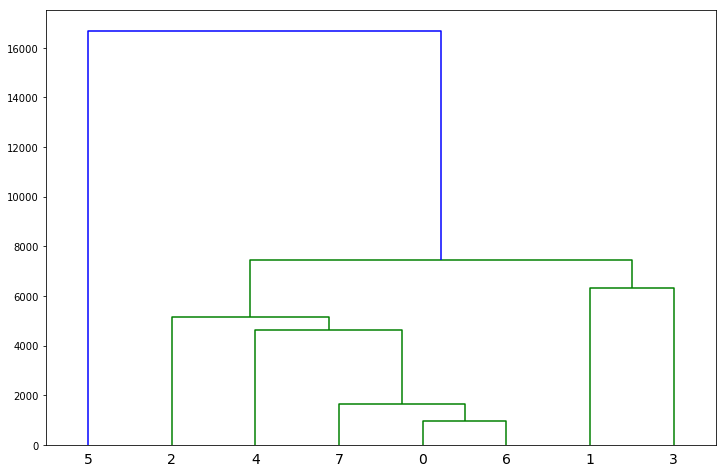

In [8]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

Z_lda = linkage(lda.components_, 'complete')
plt.figure(figsize=(12, 8))
dendrogram(Z_lda, leaf_font_size=14)
plt.show()

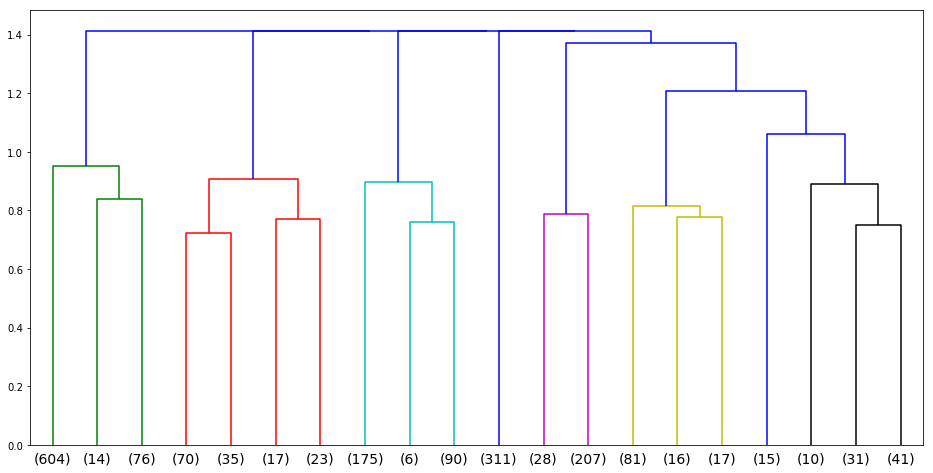

In [9]:
Z_lda = linkage(lda_topics, 'complete')
plt.figure(figsize=(16, 8))
dendrogram(
    Z_lda,
    truncate_mode='lastp',  # mostrar sólo los últims p clusters
    p=20,                   
    show_leaf_counts=True,  # mostrar entre paréntesis el número de elementos en cada cluster
    leaf_font_size=14.,
)
plt.show()

## Factorización de matrices no negativas (NNMF o NMF)

Una forma muy común de representar una colección de documentos es mediante una **matriz documentos-términos**. En una matriz documentos-términos los renglones representan documentos y las columnas corresponden a los términos/tokens utilizados en el corpus. Las celdas suelen contener medidas de importancia de cada término en un documento dado, por ejemplo, mediante valores de tf-idf. Una dificultad al utilizar estas matrices para representar la colección de documentos es la cantidad, típicamente grande, de atributos utilizados.

El objetivo de la técnica NMF es obtener una factorización de la matriz documentos-términos original $\mathbf{V}$ en dos matrices de menor dimensión $\mathbf{W}$ y $\mathbf{H}$. Dado que el problema no tiene solución exacta, para el caso general, lo usual es obtener una solución aproximada:

![](images/nmf.png)

Aquí, $\mathbf{V}, \mathbf{W}$ y $\mathbf{H}$ son matrices con todas las entradas no negativas; $\mathbf{V}$ es una matriz de tamaño $m\times n$, $\mathbf{W}$ es una matriz de tamaño $m\times k$ y $\mathbf{H}$ una matriz de tamaño $k\times n$. Por otra parte, el valor de $k$ se selecciona en el rango $[1, \min {(m,n)}]$, de manera que las dimensiones de las matrices factor pueden ser considerablemente menores que las dimensiones de la matriz original.

Observemos que $\mathbf{V}$ está formada por $m$ renglones (cada uno representando un documento) y $n$ columnas (cada una representando un token). Ahora, $\mathbf{W}$ contiene $m$ renglones, nuevamente uno por documento, y $k$ columnas que contienen los descriptores de los documentos; estos descriptores son un conjunto (reducido) de rasgos nuevos. Por otra parte,  $\mathbf{H}$ contiene $k$ renglones (uno por cada nuevo rasgo) y $n$ columnas (que representan los tokens). Así, $\mathbf{W}$ relaciona los documentos con el nuevo conjunto de rasgos y $\mathbf{H}$ relaciona los nuevos rasgos con los tokens. 

Repetimos el ejercicio hecho con LDA:

In [10]:
num_topics = 8
# Creación del operador
nmf = decomposition.NMF(n_components=num_topics)
# Factorización de la matriz documentos-términos
nmf_topics = nmf.fit_transform(X)

print("Tamaño de la matriz original (V):", X.shape)
print("Tamaño de la matriz de coeficientes (W):", nmf_topics.shape)
print("Tamaño de la matriz diccionario (H):", nmf.components_.shape)

Tamaño de la matriz original (V): (1867, 27953)
Tamaño de la matriz de coeficientes (W): (1867, 8)
Tamaño de la matriz diccionario (H): (8, 27953)


A continuación mostramos como se estructuraron los tópicos (la forma en que cada nuevo rasgo se relaciona con los atributos originales):

In [11]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 50
nmf_topic_words = []
for topic in nmf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    nmf_topic_words.append([X_vocab[i] for i in word_idx])

for i, row in zip(range(len(nmf_topic_words)), nmf_topic_words):
    print(i, row, "\n")

0 ['avengers', 'hulk', 'captain_america', 'iron_man', 'marvel_comics', 'comics', 'fantastic_four', 'marvel', 'thor', 'character', 'stark', 'one', 'series', 'earth', 'team', 'time', 'later', 'black_panther', 'appears', 'armor', 'also', 'battle', 'new', 'shield', 'death', 'vision', 'hercules', 'hawkeye', 'voiced', 'heroes', 'member', 'powers', 'first', 'storyline', 'vol', 'part', 'rhodes', 'namor', 'version', 'would', 'issue', 'silver_surfer', 'created', 'sentry', 'revealed', 'head', 'however', 'power', 'help', 'civil_war'] 

1 ['x_men', 'cyclops', 'uncanny_x_men', 'rogue', 'magneto', 'comics', 'xavier', 'powers', 'mutant', 'marvel_comics', 'team', 'mutants', 'apocalypse', 'time', 'phoenix', 'jean', 'vol', 'also', 'one', 'mystique', 'gambit', 'scott', 'jean_grey', 'storm', 'beast', 'x_factor', 'later', 'iceman', 'however', 'psylocke', 'colossus', 'battle', 'new_x_men', 'power', 'phoenix_force', 'new', 'emma', 'body', 'emma_frost', 'new_mutants', 'control', 'kitty', 'able', 'angel', 'cabl

Por otra parte, cada documento queda representado por $k$ coeficientes que describen la "*pertenencia*" del documento a cada tópico:

In [12]:
# Normalizar la matriz de coeficientes
nmf_topic_norm = nmf_topics / np.sum(nmf_topics, axis=1, keepdims=True) 

# Obtener los títulos de los documentos
page_titles = np.asarray(list(comicsDf.title))

num_groups = len(set(page_titles))
nmf_topic_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(page_titles))):
    # Promedios, útiles cuando hay documentos con títulos repetidos
    nmf_topic_grouped[i, :] = np.mean(nmf_topic_norm[page_titles == name, :], axis=0)

nmf_pages = pd.DataFrame(data=nmf_topic_grouped, index=page_titles, 
                   columns=["T" + str(i) for i in range(num_topics)])

display(nmf_pages[0:20])
display(nmf_pages[500:520])
display(nmf_pages[1000:1020])

/Users/rsotoc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


,T0,T1,T2,T3,T4,T5,T6,T7
'Mazing Man,0.196849,0.018904,0.077616,0.168456,0.000000,0.025130,0.010468,0.502576
711 (Quality Comics),0.047255,0.000000,0.039798,0.086810,0.000000,0.025807,0.000000,0.800331
Abigail Brand,0.216649,0.361182,0.072696,0.000000,0.054975,0.000000,0.061189,0.233309
Abin Sur,0.033217,0.005580,0.002217,0.000000,0.785596,0.021527,0.000000,0.151862
Abner Jenkins,0.384875,0.000000,0.443972,0.000000,0.013126,0.001086,0.000000,0.156942
Abyss (comics),0.231214,0.367698,0.058401,0.000000,0.000272,0.000484,0.035653,0.306277
Ace the Bat-Hound,0.000000,0.000000,0.000000,0.974356,0.013023,0.012621,0.000000,0.000000
Acrata,0.000000,0.000000,0.000000,0.187998,0.000000,0.124454,0.000000,0.687548
Adam Strange,0.064265,0.000000,0.004978,0.035723,0.135080,0.021336,0.000000,0.738617
Adam Warlock,0.525795,0.014280,0.044686,0.001388,0.104776,0.000319,0.012680,0.296076


,T0,T1,T2,T3,T4,T5,T6,T7
Fang (comics),0.045453,0.293419,0.000000,0.000000,0.062758,0.000000,0.346979,0.251390
Fantomex,0.089497,0.295042,0.035111,0.044370,0.004885,0.006926,0.294360,0.229809
Fastback (comics),0.004246,0.005871,0.002252,0.000000,0.003456,0.002524,0.000000,0.981652
Fate (comics),0.000000,0.000000,0.000000,0.000000,0.000000,0.002257,0.000000,0.997743
Felicity Hardy,0.013807,0.021882,0.705095,0.006850,0.000000,0.000000,0.000000,0.252367
Feral (comics),0.065795,0.285814,0.009826,0.000000,0.000000,0.000000,0.419619,0.218946
Feron,0.164951,0.351163,0.022520,0.000000,0.044248,0.000000,0.000000,0.417117
Ferro Lad,0.096637,0.072051,0.021100,0.000000,0.083380,0.114402,0.000000,0.612429
Fever (DC Comics),0.027456,0.000000,0.000000,0.005072,0.000000,0.000000,0.000000,0.967472
Fightin' 5,0.259536,0.075264,0.000000,0.000000,0.000000,0.000000,0.000000,0.665200


,T0,T1,T2,T3,T4,T5,T6,T7
Mayhem (comics),0.016434,0.001976,0.000000,0.014205,0.646218,0.000000,0.000000,0.321168
Medphyll,0.751246,0.095676,0.118840,0.000000,0.034238,0.000000,0.000000,0.000000
Medusa (comics),0.154122,0.073690,0.067006,0.008793,0.000000,0.008643,0.003309,0.684438
Megaton Man,0.261876,0.235011,0.048885,0.000000,0.011372,0.001565,0.013549,0.427741
Meggan,0.519498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.480502
Melee (comics),0.134176,0.120027,0.048720,0.013821,0.011414,0.002175,0.000000,0.669666
Menagerie (Image Comics),0.044318,0.034609,0.002744,0.114611,0.000000,0.000000,0.000000,0.803718
Mento (comics),0.141024,0.585923,0.000000,0.000000,0.016608,0.010208,0.000000,0.246236
Mentor (Imperial Guard),0.000000,0.000000,0.000000,0.000000,0.046118,0.000000,0.004563,0.949319
Mera (comics),0.108259,0.451002,0.029611,0.004863,0.003418,0.000000,0.180786,0.222061


Y los dendrogramas:

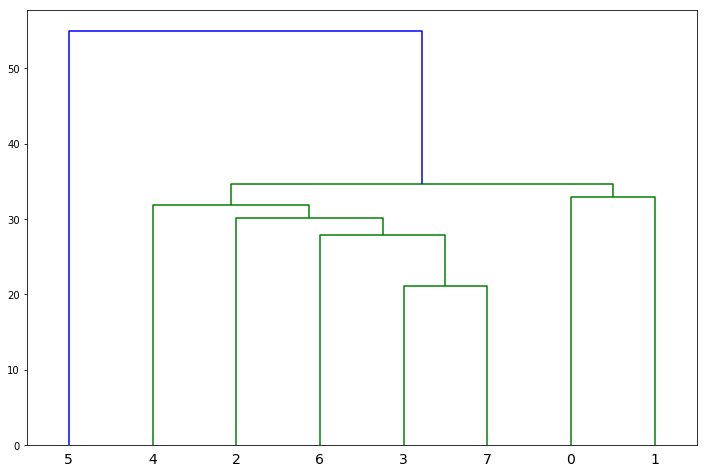

In [13]:
Z_nmf = linkage(nmf.components_, 'complete')
plt.figure(figsize=(12, 8))
dendrogram(Z_nmf, leaf_font_size=14)
plt.show()

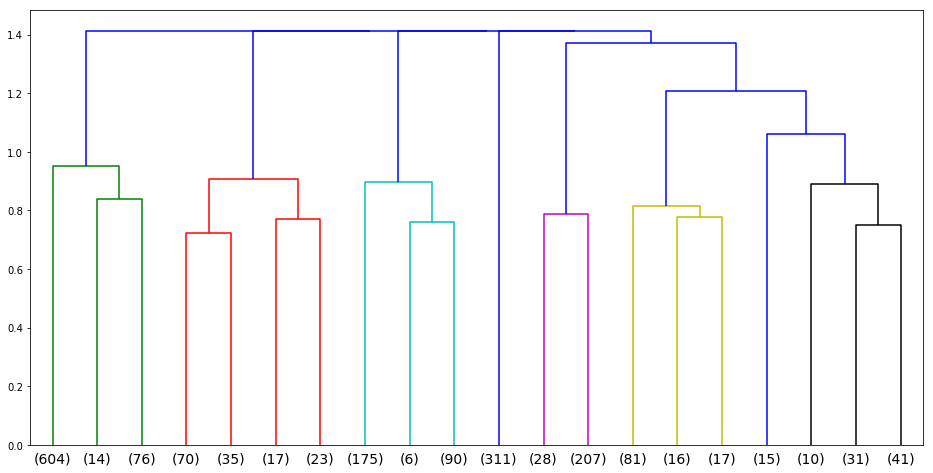

In [14]:
Z_nmf = linkage(lda_topics, 'complete')
plt.figure(figsize=(16, 8))
dendrogram(
    Z_nmf,
    truncate_mode='lastp',  # mostrar sólo los últims p clusters
    p=20,                   
    show_leaf_counts=True,  # mostrar entre paréntesis el número de elementos en cada cluster
    leaf_font_size=14.,
)
plt.show()

## Mejorando el Lexicón

La calidad de la identificación de tópicos depende de la distribución de tokens utilizados. A continuación se presentan, por ejemplo, los resultados obtenidos con el método LDA sobre la descripción original:

In [15]:
# Crear el contador. Especificamos las palabras de paro
vectorizer_global = CountVectorizer(stop_words='english')
# Construir la matriz documentos-términos
X_global = vectorizer_global.fit_transform(comicsDf.description)
X_global_array = X_global.toarray()
X_global_vocab = np.array(vectorizer_global.get_feature_names())

print("Se generó una matriz de tamaño:", X_global.shape)

num_topics = 8
# Creación del operador. En la versión 0.19, el argumento n_topics cambia a n_components
lda_global = decomposition.LatentDirichletAllocation(n_topics=num_topics,
                                              learning_method='online')
# Factorización de la matriz documentos-términos
lda_global_topics = lda_global.fit_transform(X_global)

Se generó una matriz de tamaño: (1867, 49676)


/Users/rsotoc/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [16]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 100
lda_global_topic_words = []
for topic in lda_global.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    lda_global_topic_words.append([X_global_vocab[i] for i in word_idx])

for i, row in zip(range(len(lda_global_topic_words)), lda_global_topic_words):
    print(i, row, "\n")

0 ['dragon', 'spawn', 'image', 'savage', 'lobo', 'issues', 'youngblood', 'collects', 'head', 'hardware', 'carrot', 'mcfarlane', 'eradicator', 'shadowhawk', 'witchblade', 'book', 'crew', 'angela', 'volume', 'zoo', 'collection', 'liefeld', 'larsen', 'comic', 'category', 'cow', 'ravage', 'rob', 'transformers', 'noble', 'published', 'issue', 'manphibian', 'wildstar', 'celeste', 'gaiman', 'maxx', 'bug', 'julie', 'flaming', 'zera', 'contains', 'hell', 'series', 'titles', 'gaia', 'trade', 'chapel', 'ambush', 'todd', 'badrock', 'mammon', 'freshmen', 'prophet', 'zeitgeist', 'valentino', 'heaven', 'proof', 'overlord', 'majestic', 'god', 'parody', 'angel', 'whip', 'characters', 'fictional', 'yankee', 'rusty', 'alva', 'simmons', 'hellspawn', 'isbn', 'origins', 'vicious', 'special', 'turtle', 'released', 'police', 'animal', 'paulie', 'amy', 'circuit', 'nyx', 'mighty', 'kobalt', 'superpatriot', 'poodle', 'comics', 'al', 'paperback', 'googam', 'doc', 'amazing', 'blacklight', 'centurion', 'furman', 'a

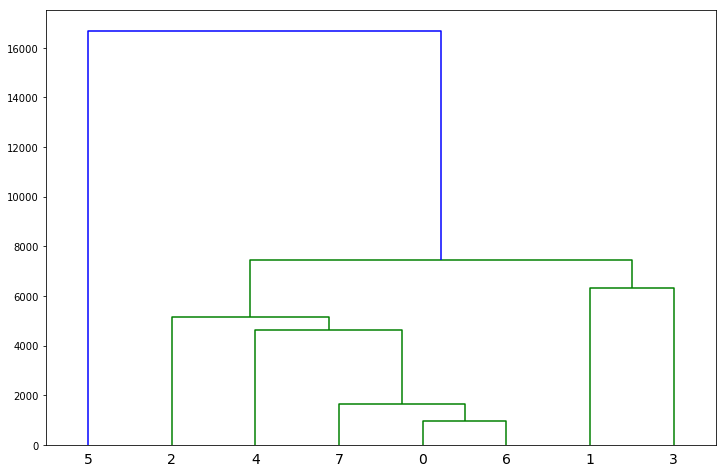

In [17]:
Z_lda = linkage(lda.components_, 'complete')
plt.figure(figsize=(12, 8))
dendrogram(Z_lda, leaf_font_size=14)
plt.show()

La distribución de probabilidades de palabras en los prototipos de tópico pueden, por otra parte, ayudarnos a reducir los términos en el lexicón. Consideremos los siguientes términos, seleccionados en base a su frecuencia en los tópicos, según el método LDA:

In [18]:
df = pd.DataFrame(lda.components_)

to_eliminate_lda = []
preserve = []
for i, col in zip(range(df.shape[1]), df):
    m = np.mean(df[col])
    if m < 2.5e-1: # Seleccionar palabras con frecuencia menor a 0.1
        r = 0
        w = X_vocab[i]
        for row in comicsDf.new_description:
            if re.match(w, row): # conservar los nombres de página como token
                preserve.append(w)
                break
            r += 1
        if r == len(comicsDf):
            to_eliminate_lda.append(w)
            if len(to_eliminate_lda) < 50:
                print(m, w)

print("\nPalabras preseleccionadas para eliminación", len(to_eliminate_lda), '\n')

0.2263010656196795 abilities_category
0.23571416635789144 abilities_category_fictional_extraterrestrial
0.2423866035348915 abilities_category_golden_age
0.23571582377690578 abilities_category_image_comics_superheroes
0.23900755290997094 abilities_category_lgbt
0.2357102679611618 abilities_category_marvel_comics_characters
0.23249885324472253 abilities_category_marvel_comics_superheroes
0.22630176840245436 abilities_likewise
0.23249706752072333 abilities_similarly
0.22630810701971987 absorbing_man_black
0.23249882844179115 absorbing_man_marvel
0.23901117630612187 academy_avengers_academy
0.2324870618690521 academy_x_new_mutants
0.23250274284533778 academy_x_new_x_men
0.24239012878006452 action_comics_american
0.23249798480198122 action_comics_character
0.2494060260648272 action_comics_dec
0.24585558647900874 action_comics_first_appeared
0.2325022480429823 action_comics_flashback
0.22629822964439875 action_comics_jan
0.23901737694672337 action_comics_king
0.24585405343485586 action_comic

De manera semejante, las palabras de baja frecuencias, de acuerdo al método NMF, son:

In [19]:
df = pd.DataFrame(nmf.components_)

to_eliminate_nmf = []
preserve = []
for i, col in zip(range(df.shape[1]), df):
    m = np.mean(df[col])
    if m < 2e-4:
        r = 0
        w = X_vocab[i]
        for row in comicsDf.new_description:
            if re.match(w, row): 
                preserve.append(w)
                break
            r += 1
        if r == len(comicsDf):
            to_eliminate_nmf.append(w)
            if len(to_eliminate_nmf) < 50:
                print(m, w)

print("\nPalabras preseleccionadas para eliminación", len(to_eliminate_nmf), '\n')

1.5217660479481735e-05 abilities_category
0.00017158911752967868 abilities_category_characters_created
3.6860037000359085e-05 abilities_category_golden_age
6.99351236343768e-06 abilities_category_image_comics_superheroes
5.5005184356526335e-05 abilities_category_lgbt
0.00018701149955918178 abilities_category_marvel_comics_characters
0.00015626220692945803 abilities_category_superheroes
9.019193240299825e-05 abilities_likewise
0.00010436651304618977 absorbing_man_marvel
6.606093938238441e-05 academy_avengers_academy
0.0001561864467715578 academy_x_new_mutants
0.0001561864467715578 academy_x_new_x_men
6.597986453161305e-06 action_comics_dec
7.462489310145856e-05 action_comics_king
5.4730940333934084e-05 action_comics_night
7.462489310145856e-05 action_comics_title
0.00015996883587009495 active_roles
2.5156394792103747e-05 actors_category
2.8386960712078473e-05 actors_category_characters_created
1.9617655551524938e-05 actors_category_dc_comics
1.140686639877952e-06 actors_category_marvel_

In [20]:
dif = list(set(to_eliminate_lda) - set(to_eliminate_nmf))
matches = list(set(to_eliminate_lda) & set(to_eliminate_nmf))

matches_array = np.array(matches[:60])
matches_array = np.reshape(matches_array, (30, 2))
matches_df = pd.DataFrame(matches_array)

display(matches_df)
print("\nPalabras coincidentes", len(matches))

,0,1
0,first_publications,death_x_treme_x_men
1,also_seem,super_hero_contest
2,new_agent_liberty,issue_mini_series_dc
3,immortal_man_story,deities_category_female_characters
4,vol_pages_august,character_would_take
5,two_one_annual,comics_ice
6,new_powered,post_crisis_legion
7,military_captains_category_marvel_comics_characters,assassins_category_marvel_comics_characters
8,first_metahuman,big_bang_comics_october
9,powers_superhuman_abilities,comics_draft



Palabras coincidentes 1334


In [21]:
rest = list(set(to_eliminate_lda + to_eliminate_nmf) - set(matches))
for w in rest:
    if '_' in w:
        matches.append(w)
matches = sorted(matches)

print("\nPalabras limpias preseleccionadas para eliminación", len(matches))


Palabras limpias preseleccionadas para eliminación 3976


Reescribimos la descripción, eliminando las palabras indeseadas y volvemos a realizar la identificación de tópicos:

In [22]:
comicsDf["clean_description"] = list(map(lambda row: 
                            " ".join([w for w in row.split() if not w in matches]), 
                            comicsDf.new_description))

In [23]:
# Crear el contador
vectorizer = CountVectorizer()
# Construir la matriz documentos-términos
X = vectorizer.fit_transform(comicsDf.clean_description)
X_array = X.toarray()
X_vocab = np.array(vectorizer.get_feature_names())
        
print("Se generó una matriz de tamaño:", X.shape)

Se generó una matriz de tamaño: (1867, 23977)


In [24]:
num_topics = 8
# Creación del operador. En la versión 0.19, el argumento n_topics cambia a n_components
lda = decomposition.LatentDirichletAllocation(n_topics=num_topics,
                                              learning_method='online')
# Factorización de la matriz documentos-términos
lda_topics = lda.fit_transform(X)

print("Tamaño de la matriz documentos-términos:", X.shape)
print("Tamaño de la matriz de distribución documentos-tópicos:", lda_topics.shape)
print("Tamaño de la matriz de distribución tópicos-términos:", lda.components_.shape)

/Users/rsotoc/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Tamaño de la matriz documentos-términos: (1867, 23977)
Tamaño de la matriz de distribución documentos-tópicos: (1867, 8)
Tamaño de la matriz de distribución tópicos-términos: (8, 23977)


In [25]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 50
lda_topic_words = []
for topic in lda.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    lda_topic_words.append([X_vocab[i] for i in word_idx])

for i, row in zip(range(len(lda_topic_words)), lda_topic_words):
    print(i, row, "\n")

0 ['spawn', 'anarky', 'zeta', 'constantine', 'creeper', 'gabriel', 'john', 'darkness', 'witchblade', 'vartox', 'new_gen', 'hell', 'hellblazer', 'angela', 'deadalus', 'ryder', 'jackie', 'amethyst', 'john_constantine', 'space_ghost', 'heaven', 'manphibian', 'mcfarlane', 'released', 'top_cow', 'characters', 'grant', 'jack_ryder', 'sly', 'issues', 'rima', 'apng', 'maxima', 'zera', 'host', 'gaiman', 'eradicator', 'ultraa', 'battle', 'mini', 'one', 'mammon', 'nanobots', 'character', 'evey', 'black_orchid', 'freshmen', 'angelus', 'contains_issues', 'demon'] 

1 ['spider_man', 'avengers', 'marvel_comics', 'captain_america', 'comics', 'marvel', 'iron_man', 'later', 'one', 'character', 'also', 'new', 'time', 'shield', 'appears', 'series', 'peter', 'version', 'team', 'amazing_spider_man', 'heroes', 'however', 'part', 'hulk', 'fantastic_four', 'death', 'created', 'voiced', 'vol', 'armor', 'father', 'fight', 'costume', 'battle', 'first', 'killed', 'help', 'powers', 'stark', 'vision', 'appeared', 's

In [26]:
# Normalizar la matriz de coeficientes
lda_topics_norm = lda_topics / np.sum(lda_topics, axis=1, keepdims=True) 

# Obtener los títulos de los documentos
page_titles = np.asarray(list(comicsDf.title))

num_groups = len(set(page_titles))
lda_topics_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(page_titles))):
    # Promedios, útiles cuando hay documentos con títulos repetidos
    lda_topics_grouped[i, :] = np.mean(lda_topics_norm[page_titles == name, :], axis=0)

lda_pages = pd.DataFrame(data=lda_topics_grouped, index=page_titles, 
                   columns=["T" + str(i) for i in range(num_topics)])

display(lda_pages[0:20])

,T0,T1,T2,T3,T4,T5,T6,T7
'Mazing Man,0.000339,0.396884,0.490066,0.000339,0.015982,0.095711,0.000339,0.000339
711 (Quality Comics),0.000857,0.000857,0.000858,0.000857,0.000857,0.993999,0.000858,0.000857
Abigail Brand,0.000109,0.165483,0.000109,0.239912,0.535575,0.000109,0.000109,0.058594
Abin Sur,0.000065,0.000065,0.045392,0.000065,0.000065,0.039011,0.203468,0.711869
Abner Jenkins,0.000085,0.966721,0.000085,0.000085,0.032769,0.000085,0.000085,0.000085
Abyss (comics),0.000177,0.000177,0.004065,0.000177,0.972538,0.000177,0.000177,0.022510
Ace the Bat-Hound,0.000133,0.000133,0.804796,0.000133,0.000133,0.000133,0.194407,0.000133
Acrata,0.109434,0.000450,0.288223,0.000450,0.000450,0.056422,0.544120,0.000450
Adam Strange,0.005197,0.000077,0.079736,0.000077,0.000077,0.117602,0.756424,0.040810
Adam Warlock,0.000061,0.237214,0.000061,0.008418,0.022621,0.000061,0.000061,0.731502


In [27]:
num_topics = 8
# Creación del operador
nmf = decomposition.NMF(n_components=num_topics)
# Factorización de la matriz documentos-términos
nmf_topics = nmf.fit_transform(X)

print("Tamaño de la matriz original (V):", X.shape)
print("Tamaño de la matriz de coeficientes (W):", nmf_topics.shape)
print("Tamaño de la matriz diccionario (H):", nmf.components_.shape)

Tamaño de la matriz original (V): (1867, 23977)
Tamaño de la matriz de coeficientes (W): (1867, 8)
Tamaño de la matriz diccionario (H): (8, 23977)


In [28]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 50
nmf_topic_words = []
for topic in nmf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    nmf_topic_words.append([X_vocab[i] for i in word_idx])

for i, row in zip(range(len(nmf_topic_words)), nmf_topic_words):
    print(i, row, "\n")

0 ['justice_league', 'dc_comics', 'earth', 'time', 'one', 'also', 'captain_marvel', 'powers', 'new', 'series', 'later', 'comics', 'team', 'flash', 'shazam', 'appears', 'character', 'power', 'however', 'aquaman', 'wonder_woman', 'green_arrow', 'cyborg', 'teen_titans', 'battle', 'characters', 'version', 'two', 'father', 'member', 'revealed', 'world', 'body', 'dc', 'back', 'life', 'death', 'part', 'help', 'would', 'able', 'episode', 'first', 'titans', 'name', 'use', 'killed', 'heroes', 'america', 'voiced'] 

1 ['x_men', 'cyclops', 'uncanny_x_men', 'rogue', 'magneto', 'comics', 'xavier', 'powers', 'mutant', 'marvel_comics', 'team', 'mutants', 'apocalypse', 'time', 'phoenix', 'jean', 'vol', 'also', 'one', 'mystique', 'gambit', 'scott', 'jean_grey', 'storm', 'beast', 'x_factor', 'later', 'iceman', 'however', 'psylocke', 'colossus', 'battle', 'new_x_men', 'power', 'phoenix_force', 'emma', 'new', 'body', 'new_mutants', 'emma_frost', 'control', 'kitty', 'able', 'angel', 'cable', 'help', 'frost'

In [29]:
# Normalizar la matriz de coeficientes
nmf_topic_norm = nmf_topics / np.sum(nmf_topics, axis=1, keepdims=True) 

# Obtener los títulos de los documentos
page_titles = np.asarray(list(comicsDf.title))

num_groups = len(set(page_titles))
nmf_topic_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(page_titles))):
    # Promedios, útiles cuando hay documentos con títulos repetidos
    nmf_topic_grouped[i, :] = np.mean(nmf_topic_norm[page_titles == name, :], axis=0)

nmf_pages = pd.DataFrame(data=nmf_topic_grouped, index=page_titles, 
                   columns=["T" + str(i) for i in range(num_topics)])

display(nmf_pages[0:20])
display(nmf_pages[500:520])
display(nmf_pages[1000:1020])

/Users/rsotoc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


,T0,T1,T2,T3,T4,T5,T6,T7
'Mazing Man,0.317690,0.022007,0.091462,0.188359,0.000000,0.030845,0.012461,0.337174
711 (Quality Comics),0.663998,0.000000,0.061550,0.127285,0.000000,0.041622,0.000000,0.105545
Abigail Brand,0.127171,0.363352,0.073928,0.000000,0.052055,0.000000,0.062636,0.320858
Abin Sur,0.091331,0.006188,0.002488,0.000000,0.820636,0.025194,0.000000,0.054164
Abner Jenkins,0.076375,0.000000,0.402712,0.000000,0.011091,0.001033,0.000000,0.508788
Abyss (comics),0.171231,0.379103,0.060883,0.000000,0.000218,0.000501,0.037422,0.350643
Ace the Bat-Hound,0.000000,0.000000,0.000000,0.973351,0.012785,0.013864,0.000000,0.000000
Acrata,0.544270,0.000000,0.000000,0.263708,0.000000,0.192022,0.000000,0.000000
Adam Strange,0.585507,0.000000,0.007331,0.050043,0.186122,0.032940,0.000000,0.138058
Adam Warlock,0.145152,0.012936,0.040848,0.001175,0.089031,0.000285,0.011693,0.698879


,T0,T1,T2,T3,T4,T5,T6,T7
Fang (comics),0.149839,0.323003,0.000000,0.000000,0.065027,0.000000,0.388598,0.073533
Fantomex,0.132546,0.313713,0.037741,0.045215,0.004843,0.007744,0.318446,0.139753
Fastback (comics),0.964041,0.010547,0.004026,0.000000,0.005823,0.004810,0.000000,0.010753
Fate (comics),0.995590,0.000000,0.000000,0.000000,0.000000,0.004410,0.000000,0.000000
Felicity Hardy,0.152201,0.024361,0.793731,0.007273,0.000000,0.000000,0.000000,0.022435
Feral (comics),0.126545,0.304736,0.010590,0.000000,0.000000,0.000000,0.455190,0.102938
Feron,0.255606,0.397208,0.025762,0.000000,0.047072,0.000000,0.000000,0.274351
Ferro Lad,0.433023,0.093995,0.027814,0.000000,0.102380,0.157557,0.000000,0.185231
Fever (DC Comics),0.921510,0.000000,0.000000,0.008185,0.000000,0.000000,0.000000,0.070305
Fightin' 5,0.440987,0.092068,0.000000,0.000000,0.000000,0.000000,0.000000,0.466945


,T0,T1,T2,T3,T4,T5,T6,T7
Mayhem (comics),0.211679,0.002374,0.000000,0.016503,0.740230,0.000000,0.000000,0.029214
Medphyll,0.000000,0.070716,0.088717,0.000000,0.023872,0.000000,0.000000,0.816696
Medusa (comics),0.488189,0.097006,0.089169,0.010942,0.000000,0.011977,0.004441,0.298275
Megaton Man,0.250007,0.253365,0.053303,0.000000,0.011483,0.001752,0.014904,0.415186
Meggan,0.254215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.745785
Melee (comics),0.480524,0.158919,0.065201,0.017380,0.014122,0.002984,0.000000,0.260870
Menagerie (Image Comics),0.672206,0.053385,0.004227,0.169796,0.000000,0.000000,0.000000,0.100386
Mento (comics),0.139913,0.614667,0.000000,0.000000,0.016387,0.011301,0.000000,0.217733
Mentor (Imperial Guard),0.914533,0.000000,0.000000,0.000000,0.077308,0.000000,0.008159,0.000000
Mera (comics),0.126382,0.473624,0.031429,0.004854,0.003352,0.000000,0.193156,0.167202


Y volviendo a analizar palabras indeseadas:

In [30]:
df = pd.DataFrame(lda.components_)

to_eliminate_lda = []
for i, col in zip(range(df.shape[1]), df):
    w = X_vocab[i]
    if not w in preserve:
        m = np.mean(df[col])
        if m < 5e-1: # Flexibilizamos la identificación de palabras no significativas
            r = 0
            for row in comicsDf.clean_description:
                if re.match(w, row): 
                    preserve.append(w)
                    break
                r += 1
            if r == len(comicsDf):
                to_eliminate_lda.append(w)
                if len(to_eliminate_lda) < 50:
                    print(m, w)
                
print("\nPalabras preseleccionadas para eliminación", len(to_eliminate_lda), '\n')

0.4916371309028977 abilities_included
0.36483325767035724 abilities_originally
0.3960396436301861 abomination_comics
0.34639052952544486 absorbing_man_defeated
0.48222408749857987 absorbing_many
0.2684977692933333 academy_vol
0.3687341327382506 academy_x_marvel
0.4648678901511172 acolytes_comics
0.34356592795929175 acolytes_comics_marvel
0.36967421718981414 action_comics_brainiac
0.2644900892864514 action_comics_first
0.35058006552441856 action_comics_nightwing
0.2644886134518444 action_comics_oct
0.26449377883435304 action_comics_superboy
0.34308216248199136 adopted_category_female_characters
0.2567581147078158 adopted_category_female_supervillains
0.39993749468583356 adopted_category_superhero
0.3215173287506191 adventure_comics_aquaman
0.36567794152247235 adventure_comics_aug
0.4038615505495126 adventure_comics_debuted
0.35123568682347067 adventure_comics_featuring
0.26448507012640454 adventure_comics_first
0.41972129453444856 adventure_comics_superman
0.483414454219112 adventure_co

In [31]:
df = pd.DataFrame(nmf.components_)

to_eliminate_nmf = []
for i, col in zip(range(df.shape[1]), df):
    w = X_vocab[i]
    if not w in preserve:
        m = np.mean(df[col])
        if m < 1e-3:
            r = 0
            for row in comicsDf.clean_description:
                if re.match(w, row): 
                    preserve.append(w)
                    break
                r += 1
            if r == len(comicsDf):
                to_eliminate_nmf.append(w)
                if len(to_eliminate_nmf) < 50:
                    print(m, w)

print("\nPalabras preseleccionadas para eliminación", len(to_eliminate_nmf), '\n')

0.0006842352139579653 abdul
0.0004957120743030005 abilities_category_marvel_comics
0.0007966382111473742 abilities_image
0.0003693477469442957 abilities_originally
0.000379693799976429 absorbing_man_defeated
0.0003874742519751429 academy_vol
0.0005448848261162983 academy_x_marvel
0.0009725013634164323 acolytes_comics_marvel
0.0007021849573392303 action_comics_brainiac
0.0008245283690833722 action_comics_first
0.0009412423042766889 adopted_category_female_characters
0.00039120682850761474 adopted_category_female_supervillains
0.0008796907335266434 adrian_chase
0.0005071096092863454 adventure_comics_featuring
0.0006970349002496778 adventure_comics_vol_september
0.0005636819261572281 adventures_episode
0.0008389312811012514 age_characters
0.00047728842948124015 age_comic
0.0004613763189658109 age_heroes_comics
0.00035623451474143234 age_superhero
0.000696669712064816 age_versions
0.0006271046276659802 age_vision
0.0005213137578145532 agent_axis
0.0005096130317290514 agents_category_fictio

In [32]:
dif = list(set(to_eliminate_lda) - set(to_eliminate_nmf))
matches = list(set(to_eliminate_lda) & set(to_eliminate_nmf))

rest = list(set(to_eliminate_lda + to_eliminate_nmf) - set(matches))
for w in rest:
    if '_' in w:
        matches.append(w)
matches = sorted(matches)

print("\nPalabras limpias preseleccionadas para eliminación", len(matches))


Palabras limpias preseleccionadas para eliminación 3020


Por inspección, es conveniente seleccionar para preservar aquellas palabras/tokens que, aunque de baja probabilidad, pueden ser importantes para describir un tópico:

In [33]:
preserve = preserve + ['black_magician', 'black_power', 'black_powers', 'super_heroism', 'super_human_levels', 
                       'super_human_strength', 'super_teams', 'super_teams', 'x_rays']

for w in preserve:
    if w in matches:
        matches.remove(w)

print("Palabras limpias preseleccionadas para eliminación", len(set(matches)))

Palabras limpias preseleccionadas para eliminación 3013


In [34]:
comicsDf["clean_description"] = list(map(lambda row: 
                            " ".join([w for w in row.split() if not w in matches]), 
                            comicsDf.clean_description))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comicsDf.clean_description)
X_array = X.toarray()
X_vocab = np.array(vectorizer.get_feature_names())
        
print("Se generó una matriz de tamaño:", X.shape)

Se generó una matriz de tamaño: (1867, 20964)


In [35]:
num_topics = 8

# Creación del operador. En la versión 0.19, el argumento n_topics cambia a n_components
lda = decomposition.LatentDirichletAllocation(n_topics=num_topics,
                                              learning_method='online')
lda_topics = lda.fit_transform(X)
df = pd.DataFrame(lda.components_)
to_eliminate_lda = []
for i, col in zip(range(df.shape[1]), df):
    w = X_vocab[i]
    if not w in preserve:
        m = np.mean(df[col])
        if m < 1.5: # Flexibilizamos la identificación de palabras no significativas
            r = 0
            for row in comicsDf.clean_description:
                if re.match(w, row): 
                    preserve.append(w)
                    break
                r += 1
            if r == len(comicsDf):
                to_eliminate_lda.append(w)
print("\nPalabras preseleccionadas para eliminación LDA", len(to_eliminate_lda), '\n')

nmf = decomposition.NMF(n_components=num_topics)
# Factorización de la matriz documentos-términos
nmf_topics = nmf.fit_transform(X)
df = pd.DataFrame(nmf.components_)
to_eliminate_nmf = []
for i, col in zip(range(df.shape[1]), df):
    w = X_vocab[i]
    if not w in preserve:
        m = np.mean(df[col])
        if m < 3e-3:
            r = 0
            for row in comicsDf.clean_description:
                if re.match(w, row): 
                    preserve.append(w)
                    break
                r += 1
            if r == len(comicsDf):
                to_eliminate_nmf.append(w)

print("\nPalabras preseleccionadas para eliminación NMF", len(to_eliminate_nmf), '\n')

dif = list(set(to_eliminate_lda) - set(to_eliminate_nmf))
matches = list(set(to_eliminate_lda) & set(to_eliminate_nmf))

rest = list(set(to_eliminate_lda + to_eliminate_nmf) - set(matches))
for w in rest:
    if '_' in w:
        matches.append(w)
matches = sorted(matches)

print("\nPalabras limpias preseleccionadas para eliminación", len(matches))

/Users/rsotoc/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)



Palabras preseleccionadas para eliminación LDA 2657 


Palabras preseleccionadas para eliminación NMF 2614 


Palabras limpias preseleccionadas para eliminación 3130


In [36]:
matches_array = np.array(matches[:60])
matches_array = np.reshape(matches_array, (30, 2))
matches_df = pd.DataFrame(matches_array)

display(matches_df)
print("\nPalabras coincidentes", len(matches))

,0,1
0,abilities_due,abilities_include
1,academy_x_marvel_comics,academy_x_men
2,accessdate_july,action_comics_august
3,action_comics_december,action_comics_january
4,action_comics_october,active_members
5,active_membership,actor_chris
6,acts_like,acute_senses
7,adam_strange_appears,adder
8,adopted_category,adopted_category_characters_created
9,adopted_category_comics,adopted_category_fictional



Palabras coincidentes 3130


In [37]:
comicsDf["clean_description"] = list(map(lambda row: 
                            " ".join([w for w in row.split() if not w in matches]), 
                            comicsDf.clean_description))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comicsDf.clean_description)
X_array = X.toarray()
X_vocab = np.array(vectorizer.get_feature_names())
        
print("Se generó una matriz de tamaño:", X.shape)

Se generó una matriz de tamaño: (1867, 17834)


In [38]:
num_topics = 8

# Creación del operador. En la versión 0.19, el argumento n_topics cambia a n_components
lda = decomposition.LatentDirichletAllocation(n_topics=num_topics,
                                              learning_method='online')
lda_topics = lda.fit_transform(X)
df = pd.DataFrame(lda.components_)
to_eliminate_lda = []
for i, col in zip(range(df.shape[1]), df):
    w = X_vocab[i]
    if not w in preserve:
        m = np.mean(df[col])
        if m < 2.8: # Flexibilizamos la identificación de palabras no significativas
            r = 0
            for row in comicsDf.clean_description:
                if re.match(w, row): 
                    preserve.append(w)
                    break
                r += 1
            if r == len(comicsDf):
                to_eliminate_lda.append(w)
print("\nPalabras preseleccionadas para eliminación LDA", len(to_eliminate_lda), '\n')

nmf = decomposition.NMF(n_components=num_topics)
# Factorización de la matriz documentos-términos
nmf_topics = nmf.fit_transform(X)
df = pd.DataFrame(nmf.components_)
to_eliminate_nmf = []
for i, col in zip(range(df.shape[1]), df):
    w = X_vocab[i]
    if not w in preserve:
        m = np.mean(df[col])
        if m < 8e-3:
            r = 0
            for row in comicsDf.clean_description:
                if re.match(w, row): 
                    preserve.append(w)
                    break
                r += 1
            if r == len(comicsDf):
                to_eliminate_nmf.append(w)

print("\nPalabras preseleccionadas para eliminación NMF", len(to_eliminate_nmf), '\n')

dif = list(set(to_eliminate_lda) - set(to_eliminate_nmf))
matches = list(set(to_eliminate_lda) & set(to_eliminate_nmf))

rest = list(set(to_eliminate_lda + to_eliminate_nmf) - set(matches))
for w in rest:
    if '_' in w:
        matches.append(w)
matches = sorted(matches)

print("\nPalabras limpias preseleccionadas para eliminación", len(matches))

/Users/rsotoc/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)



Palabras preseleccionadas para eliminación LDA 4267 


Palabras preseleccionadas para eliminación NMF 3950 


Palabras limpias preseleccionadas para eliminación 3863


In [39]:
matches_array = np.array(matches[:60])
matches_array = np.reshape(matches_array, (30, 2))
matches_df = pd.DataFrame(matches_array)

display(matches_df)
print("\nPalabras coincidentes", len(matches))

,0,1
0,aardvark,aardvark_vanaheim
1,aarkus,aaronson
2,abdul,abel
3,abilities_including,abilities_like
4,abilities_similar,abnett
5,abomination_comics_abomination,abra
6,abra_kadabra,abraxas
7,absolute_justice,academy_x
8,accessdate,accord
9,accursed,accusations



Palabras coincidentes 3863


Como puede observarse, en este caso ya aparecen términos que no debieran eliminarse. Dejamos en este punto la simplificación (aunque pudiera realizarse a un menor paso) y analizamos la identificación de tópicos

In [40]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 50
lda_topic_words = []
for topic in lda.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    lda_topic_words.append([X_vocab[i] for i in word_idx])

for i, row in zip(range(len(lda_topic_words)), lda_topic_words):
    print(i, row, "\n")

0 ['spider_man', 'comics', 'marvel', 'captain_america', 'marvel_comics', 'one', 'also', 'powers', 'later', 'time', 'new', 'fantastic_four', 'peter', 'avengers', 'series', 'character', 'team', 'however', 'death', 'appears', 'amazing_spider_man', 'shield', 'father', 'costume', 'fight', 'part', 'life', 'help', 'revealed', 'would', 'two', 'deadpool', 'battle', 'vol', 'earth', 'killed', 'version', 'voiced', 'body', 'hulk', 'first', 'may', 'head', 'back', 'new_york', 'created', 'spider', 'used', 'issue', 'storyline'] 

1 ['x_men', 'wolverine', 'comics', 'powers', 'marvel_comics', 'mutant', 'uncanny_x_men', 'magneto', 'team', 'one', 'cyclops', 'time', 'apocalypse', 'also', 'mutants', 'rogue', 'vol', 'new_mutants', 'later', 'body', 'however', 'x_force', 'member', 'x_factor', 'xavier', 'power', 'storm', 'alpha_flight', 'new', 'new_x_men', 'able', 'battle', 'death', 'ability', 'back', 'would', 'mystique', 'help', 'earth', 'beast', 'cable', 'phoenix', 'control', 'revealed', 'appears', 'school', '

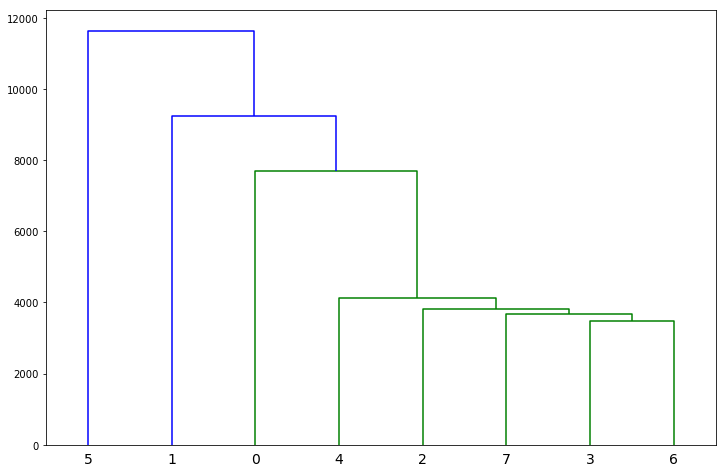

In [41]:
Z_lda = linkage(lda.components_, 'complete')
plt.figure(figsize=(12, 8))
dendrogram(Z_lda, leaf_font_size=14)
plt.show()

In [42]:
# Normalizar la matriz de coeficientes
lda_topics_norm = lda_topics / np.sum(lda_topics, axis=1, keepdims=True) 

# Obtener los títulos de los documentos
page_titles = np.asarray(list(comicsDf.title))

num_groups = len(set(page_titles))
lda_topics_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(page_titles))):
    # Promedios, útiles cuando hay documentos con títulos repetidos
    lda_topics_grouped[i, :] = np.mean(lda_topics_norm[page_titles == name, :], axis=0)

lda_pages = pd.DataFrame(data=lda_topics_grouped, index=page_titles, 
                   columns=["T" + str(i) for i in range(num_topics)])

display(lda_pages[0:20])

,T0,T1,T2,T3,T4,T5,T6,T7
'Mazing Man,0.457890,0.000347,0.000347,0.221963,0.000347,0.318412,0.000347,0.000347
711 (Quality Comics),0.000901,0.000900,0.000900,0.412650,0.000900,0.581948,0.000900,0.000900
Abigail Brand,0.504617,0.385814,0.109018,0.000110,0.000110,0.000110,0.000110,0.000110
Abin Sur,0.000066,0.000066,0.000066,0.000066,0.000066,0.134878,0.003973,0.860821
Abner Jenkins,0.216143,0.000086,0.007710,0.000086,0.775715,0.000086,0.000086,0.000086
Abyss (comics),0.000181,0.776707,0.145045,0.057235,0.020288,0.000181,0.000181,0.000181
Ace the Bat-Hound,0.000135,0.000135,0.000135,0.028638,0.000135,0.970552,0.000135,0.000135
Acrata,0.000462,0.000462,0.000462,0.058797,0.000462,0.938432,0.000462,0.000462
Adam Strange,0.000079,0.000079,0.000079,0.088482,0.000079,0.223374,0.037252,0.650576
Adam Warlock,0.082564,0.000062,0.363679,0.195251,0.000062,0.000062,0.000062,0.358257


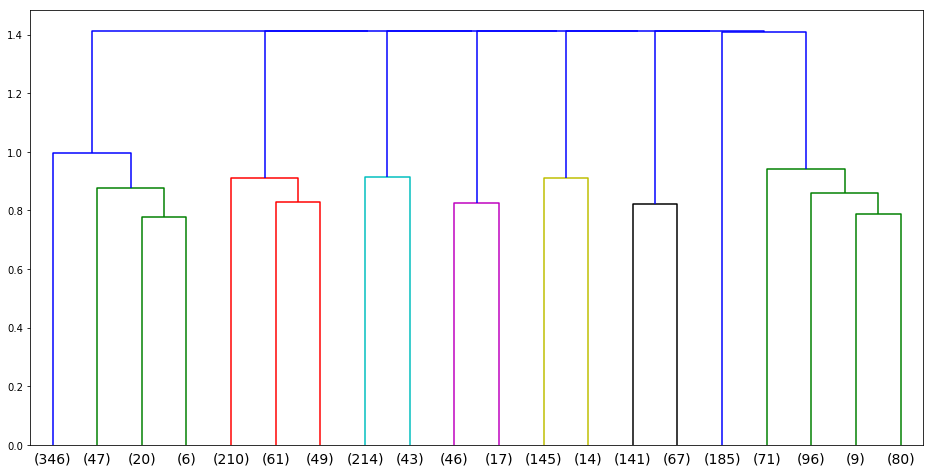

In [43]:
Z_lda = linkage(lda_topics, 'complete')
plt.figure(figsize=(16, 8))
dendrogram(
    Z_lda,
    truncate_mode='lastp',  # mostrar sólo los últims p clusters
    p=20,                   
    show_leaf_counts=True,  # mostrar entre paréntesis el número de elementos en cada cluster
    leaf_font_size=14.,
)
plt.show()

In [44]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 50
nmf_topic_words = []
for topic in nmf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    nmf_topic_words.append([X_vocab[i] for i in word_idx])

for i, row in zip(range(len(nmf_topic_words)), nmf_topic_words):
    print(i, row, "\n")

0 ['justice_league', 'dc_comics', 'earth', 'time', 'one', 'also', 'captain_marvel', 'powers', 'new', 'series', 'later', 'comics', 'team', 'flash', 'shazam', 'appears', 'character', 'power', 'however', 'aquaman', 'wonder_woman', 'green_arrow', 'cyborg', 'teen_titans', 'battle', 'characters', 'version', 'two', 'father', 'member', 'revealed', 'world', 'body', 'dc', 'back', 'life', 'death', 'part', 'help', 'would', 'able', 'episode', 'first', 'titans', 'name', 'use', 'killed', 'heroes', 'america', 'voiced'] 

1 ['x_men', 'cyclops', 'uncanny_x_men', 'rogue', 'magneto', 'comics', 'xavier', 'powers', 'mutant', 'marvel_comics', 'team', 'mutants', 'apocalypse', 'time', 'phoenix', 'jean', 'vol', 'also', 'one', 'mystique', 'gambit', 'scott', 'jean_grey', 'storm', 'beast', 'x_factor', 'later', 'iceman', 'however', 'psylocke', 'colossus', 'battle', 'new_x_men', 'power', 'phoenix_force', 'emma', 'new', 'body', 'emma_frost', 'new_mutants', 'control', 'kitty', 'able', 'angel', 'cable', 'help', 'frost'

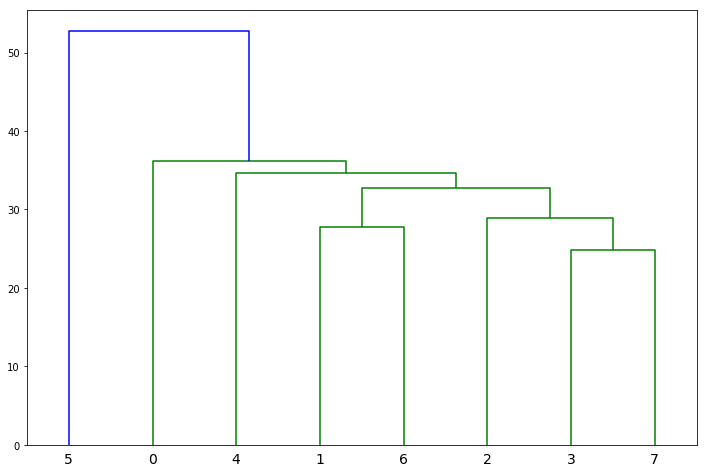

In [45]:
Z_nmf = linkage(nmf.components_, 'complete')
plt.figure(figsize=(12, 8))
dendrogram(Z_nmf, leaf_font_size=14)
plt.show()

In [46]:
# Normalizar la matriz de coeficientes
nmf_topic_norm = nmf_topics / np.sum(nmf_topics, axis=1, keepdims=True) 

# Obtener los títulos de los documentos
page_titles = np.asarray(list(comicsDf.title))

num_groups = len(set(page_titles))
nmf_topic_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(page_titles))):
    # Promedios, útiles cuando hay documentos con títulos repetidos
    nmf_topic_grouped[i, :] = np.mean(nmf_topic_norm[page_titles == name, :], axis=0)

nmf_pages = pd.DataFrame(data=nmf_topic_grouped, index=page_titles, 
                   columns=["T" + str(i) for i in range(num_topics)])

display(nmf_pages[0:20])

/Users/rsotoc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


,T0,T1,T2,T3,T4,T5,T6,T7
'Mazing Man,0.317282,0.021886,0.091250,0.187615,0.000000,0.030704,0.012426,0.338837
711 (Quality Comics),0.664149,0.000000,0.061048,0.126589,0.000000,0.041485,0.000000,0.106729
Abigail Brand,0.127001,0.362479,0.073724,0.000000,0.051875,0.000000,0.062468,0.322454
Abin Sur,0.091560,0.006180,0.002478,0.000000,0.820022,0.025157,0.000000,0.054604
Abner Jenkins,0.076160,0.000000,0.401067,0.000000,0.011035,0.001013,0.000000,0.510725
Abyss (comics),0.171013,0.378020,0.060683,0.000000,0.000226,0.000515,0.037237,0.352307
Ace the Bat-Hound,0.000000,0.000000,0.000000,0.973398,0.012766,0.013836,0.000000,0.000000
Acrata,0.544945,0.000000,0.000000,0.263399,0.000000,0.191655,0.000000,0.000000
Adam Strange,0.585326,0.000000,0.007304,0.049991,0.185576,0.032785,0.000000,0.139019
Adam Warlock,0.144607,0.012826,0.040621,0.001154,0.088511,0.000268,0.011586,0.700426


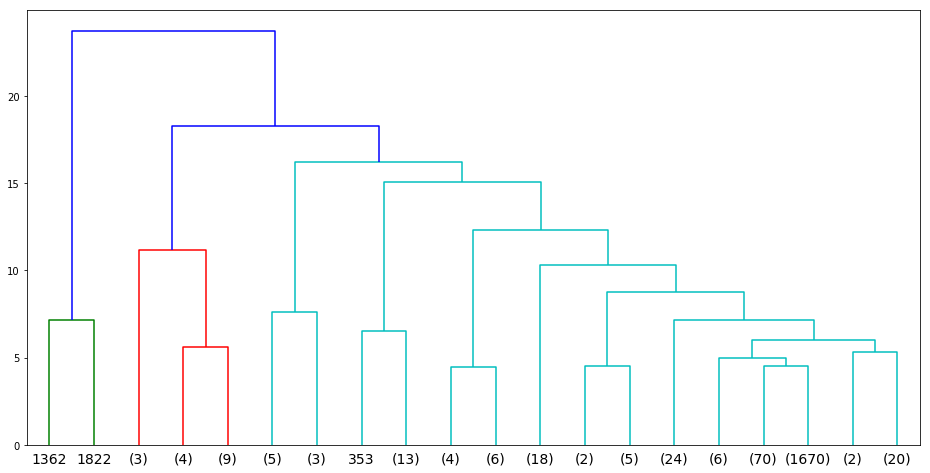

In [47]:
Z_nmf = linkage(nmf_topics, 'complete')
plt.figure(figsize=(16, 8))
dendrogram(
    Z_nmf,
    truncate_mode='lastp',  # mostrar sólo los últims p clusters
    p=20,                   
    show_leaf_counts=True,  # mostrar entre paréntesis el número de elementos en cada cluster
    leaf_font_size=14.,
)
plt.show()

In [48]:
comicsDf.to_json("Data Sets/Comics/clean_lexicon_comics.json", orient='records') 

## Conclusiones

La identificación de tópicos es una de las herramientas de análisis semántico: el resultado de este proceso es un conjunto de "*conceptos*" que permiten, por una parte, organizar los documentos en una estructura de discurso y, por otra parte, reducir la dimensionalidad del problema para etapas futuras. Adicionalmente, este análisis nos permite refinar la estructura de nuestro lexicón.

<hr style="border-width: 3px;">

### Tarea 5

Realice la identificación de tópicos en su proyecto, utilizando las técnicas LDA y NMF, así como la mejora de su lexicón.

**Fecha de entrega**: Martes 26 de septiembre.